In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import matplotlib as plt

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [6]:
mumbai_data = pd.read_csv('Mumbai.csv')
kolkata_data = pd.read_csv('Kolkata.csv')
hyderabad_data = pd.read_csv('Hyderabad.csv')
delhi_data = pd.read_csv('Delhi.csv')

In [7]:
def preProcess(data):
  return data.drop(['Location'], axis = 1)

In [8]:
mumbai_data = preProcess(mumbai_data)
kolkata_data = preProcess(kolkata_data)
hyderabad_data = preProcess(hyderabad_data)
delhi_data = preProcess(delhi_data)

In [9]:
mumbai_data['Place'] = "mumbai"
kolkata_data['Place'] = "kolkata"
hyderabad_data['Place'] = "hyderabad"
delhi_data['Place'] = "delhi"
mumbai_data

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Place
0,4850000,720,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,mumbai
1,4500000,600,1,1,1,1,1,0,1,1,...,0,1,0,0,0,0,0,0,0,mumbai
2,6700000,650,1,1,1,1,1,0,1,1,...,0,1,0,0,0,0,0,0,0,mumbai
3,4500000,650,1,1,1,0,0,1,0,1,...,1,1,0,0,0,0,0,1,0,mumbai
4,5000000,665,1,1,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7714,14500000,1180,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,mumbai
7715,14500000,530,1,1,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,mumbai
7716,4100000,700,1,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,mumbai
7717,2750000,995,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,mumbai


In [10]:
data = pd.concat([mumbai_data, kolkata_data, hyderabad_data, delhi_data])
data

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Place
0,4850000,720,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,mumbai
1,4500000,600,1,1,1,1,1,0,1,1,...,0,1,0,0,0,0,0,0,0,mumbai
2,6700000,650,1,1,1,1,1,0,1,1,...,0,1,0,0,0,0,0,0,0,mumbai
3,4500000,650,1,1,1,0,0,1,0,1,...,1,1,0,0,0,0,0,1,0,mumbai
4,5000000,665,1,1,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,2500000,540,2,1,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,delhi
4994,3000000,540,2,1,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,delhi
4995,2600000,415,1,1,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,delhi
4996,5500000,415,1,1,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,delhi


In [11]:
data = pd.get_dummies(data)
data

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Place_delhi,Place_hyderabad,Place_kolkata,Place_mumbai
0,4850000,720,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4500000,600,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,6700000,650,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,4500000,650,1,1,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,5000000,665,1,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,2500000,540,2,1,9,9,9,9,9,9,...,9,9,9,9,9,9,1,0,0,0
4994,3000000,540,2,1,9,9,9,9,9,9,...,9,9,9,9,9,9,1,0,0,0
4995,2600000,415,1,1,9,9,9,9,9,9,...,9,9,9,9,9,9,1,0,0,0
4996,5500000,415,1,1,9,9,9,9,9,9,...,9,9,9,9,9,9,1,0,0,0


In [12]:

ct = make_column_transformer(
    (MinMaxScaler(),["Area","No. of Bedrooms","MaintenanceStaff"]), 
    # turn all values in these columne to between 0 and 1
)

In [13]:
X = data.drop('Price', axis = 1)
Y = data['Price']

In [14]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)


In [15]:
ct.fit(X_train)
# Transform trainging and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)

In [22]:
# nueral network

#1 build the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1)                          
])
model.compile(
    loss=tf.keras.losses.mae, 
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), 
    metrics = ["mae"]
)
history = model.fit(X_train,Y_train, epochs = 40)

Epoch 1/40
544/544 [==============================] - 3s 4ms/step - loss: 8518268.0000 - mae: 8518268.0000
Epoch 2/40
544/544 [==============================] - 2s 4ms/step - loss: 8218713.0000 - mae: 8218713.0000
Epoch 3/40
544/544 [==============================] - 2s 3ms/step - loss: 8201730.5000 - mae: 8201730.5000
Epoch 4/40
544/544 [==============================] - 2s 3ms/step - loss: 8086461.5000 - mae: 8086461.5000
Epoch 5/40
544/544 [==============================] - 2s 3ms/step - loss: 7880514.0000 - mae: 7880514.0000
Epoch 6/40
544/544 [==============================] - 2s 3ms/step - loss: 7737758.0000 - mae: 7737758.0000
Epoch 7/40
544/544 [==============================] - 2s 3ms/step - loss: 7701910.5000 - mae: 7701910.5000
Epoch 8/40
544/544 [==============================] - 2s 4ms/step - loss: 7621835.0000 - mae: 7621835.0000
Epoch 9/40
544/544 [==============================] - 2s 4ms/step - loss: 7574129.5000 - mae: 7574129.5000
Epoch 10/40
544/544 [================

Text(0, 0.5, 'loss')

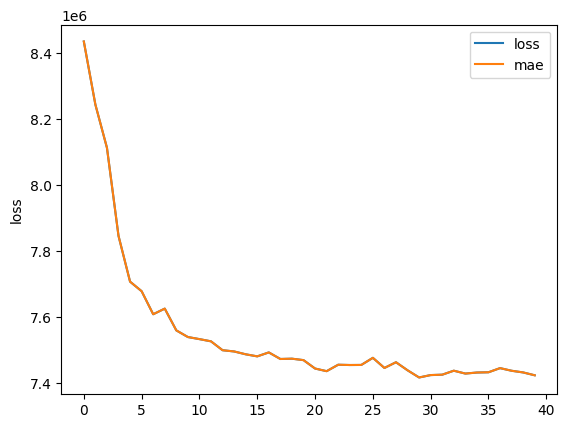

In [17]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
#change from 500 to 250 epochs

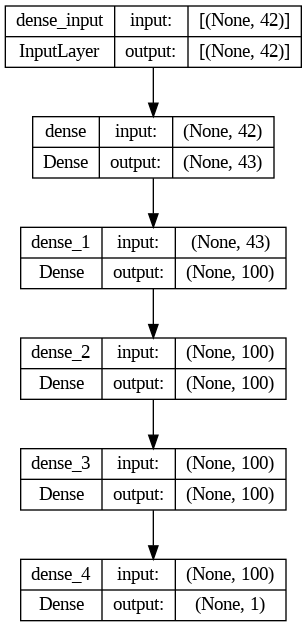

In [18]:
plot_model(model=model, show_shapes=True)

In [23]:
y_pred = model.predict(X_test)
y_pred

136/136 [==============================] - 0s 2ms/step


array([[4585765.5],
       [9004130. ],
       [6981592.5],
       ...,
       [5491272.5],
       [4865228. ],
       [5710634. ]], dtype=float32)

In [24]:
loss = tf.keras.losses.mean_absolute_error(Y_test, y_pred)
loss

<tf.Tensor: shape=(4349,), dtype=float32, numpy=
array([9205692., 9082176., 8859204., ..., 8987701., 9125675., 8953639.],
      dtype=float32)>

In [ ]:
X_test["Area"]

4513     675
3230     600
2046    1100
7375     362
4648    1436
        ... 
485     1237
962     1100
967      510
4447    1106
1780    1155
Name: Area, Length: 4349, dtype: int64

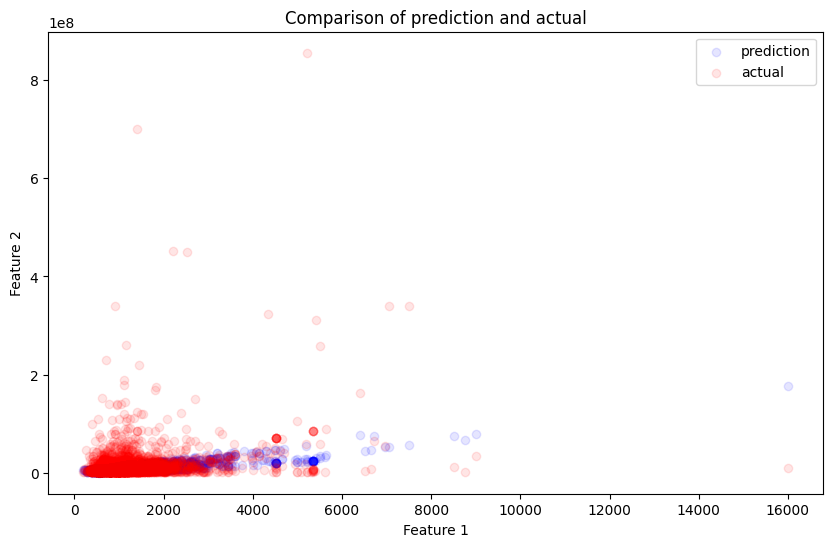

In [ ]:
x = X_test["Area"]
plt.figure(figsize=(10, 6))
plt.scatter(x, y_pred, c='blue', alpha=0.1, label='prediction')
plt.scatter(x, Y_test, c='red', alpha=0.1, label='actual')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Comparison of prediction and actual')
plt.show()